# **Análise de dados sobre os Acidentes de trânsito de 2022**

## Justificativa da escolha da base/tema

A ideia geral do trabalho é realizar uma análise dos acidentes ocorridos em 2022, utilizando dados que incluem informações como data, natureza do acidente, bairro onde ocorreu, tipo de veículos envolvidos (automóveis, motocicletas, pedestres), condições climáticas no momento do acidente, situação dos semáforos, sinalizações de trânsito, condições da via, velocidade máxima permitida na via e pontos de controle.

A análise dos dados será conduzida utilizando a linguagem de programação Python e as bibliotecas numpy, pandas, matplotlib.pyplot e seaborn.

Essa análise tem como resultado um potencial impacto significativo na segurança viária e pode beneficiar diversas partes interessadas na busca por estradas mais seguras e eficazes. Trazendo informações a comunidade sobre áreas de risco e fornecer dados valiosos para pesquisadores e acadêmicos

## Análise Exploratória

### Importando a base, as bibliotecas que serão utilizadas e vendo um panorâma inicial dos dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Realizando a importação da base
dados = pd.read_csv('https://raw.githubusercontent.com/thiagobrit0/DataScience/main/acidentes2022.2.csv', sep=';')

In [ ]:
# Visualizando as 5 primeiras linhas da base para vermos uma prévia dos dados
dados.head()

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,202200001,01/01/2022,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,130,NaN,JORDÃO,...,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,202200007,01/01/2022,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,IMBIRIBEIRA,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
2,202200025,01/01/2022,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,CAXANGÁ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202200029,01/01/2022,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,JOANA BEZERRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202200082,02/01/2022,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,432,RUA CARNEIRO VILELA,AFLITOS,...,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN


In [ ]:
# Conhecendo o tamanho da nossa base
print(f'A base de dados apresenta {dados.shape[0]} linhas e {dados.shape[1]} colunas')

A base de dados apresenta 2669 linhas e 37 colunas


In [ ]:
# Verificando como estão organizados e quais os seus tipos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Protocolo                  2669 non-null   int64  
 1   data                       2669 non-null   object 
 2   hora                       0 non-null      float64
 3   natureza                   2669 non-null   object 
 4   situacao                   2669 non-null   object 
 5   bairro                     2659 non-null   object 
 6   endereco                   2663 non-null   object 
 7   numero                     1501 non-null   object 
 8   detalhe_endereco_acidente  1013 non-null   object 
 9   bairro_cruzamento          2659 non-null   object 
 10  num_semaforo               631 non-null    float64
 11  sentido_via                1552 non-null   object 
 12  tipo                       2563 non-null   object 
 13  auto                       2669 non-null   int64

In [ ]:
# Tipos dos dados existentes em cada coluna
dados.dtypes.value_counts()

object     23
int64      12
float64     2
dtype: int64

In [ ]:
# Listando todas as colunas
dados.columns.to_list()

['Protocolo',
 'data',
 'hora',
 'natureza',
 'situacao',
 'bairro',
 'endereco',
 'numero',
 'detalhe_endereco_acidente',
 'bairro_cruzamento',
 'num_semaforo',
 'sentido_via',
 'tipo',
 'auto',
 'moto',
 'ciclom',
 'ciclista',
 'pedestre',
 'onibus',
 'caminhao',
 'viatura',
 'outros',
 'vitimas',
 'vitimasfatais',
 'acidente_verificado',
 'tempo_clima',
 'situacao_semaforo',
 'sinalizacao',
 'condicao_via',
 'conservacao_via',
 'ponto_controle',
 'situacao_placa',
 'velocidade_max_via',
 'mao_direcao',
 'divisao_via1',
 'divisao_via2',
 'divisao_via3']

In [ ]:
# Criando um dataframe reserva caso aconteça algum imprevisto com o que estivermos trablhando
dados_reserva = dados.copy()

In [ ]:
# Verificando a quantidade de valores nulos por coluna
dados.isna().sum()

Protocolo                       0
data                            0
hora                         2669
natureza                        0
situacao                        0
bairro                         10
endereco                        6
numero                       1168
detalhe_endereco_acidente    1656
bairro_cruzamento              10
num_semaforo                 2038
sentido_via                  1117
tipo                          106
auto                            0
moto                            0
ciclom                          0
ciclista                        0
pedestre                        0
onibus                          0
caminhao                        0
viatura                         0
outros                          0
vitimas                         0
vitimasfatais                   0
acidente_verificado           577
tempo_clima                   558
situacao_semaforo             579
sinalizacao                   590
condicao_via                  566
conservacao_vi

In [ ]:
# Verificando a quantidade total de valores nulos no dataset
dados.isna().sum().sum()

21840

### Criando um novo DataFrame apenas com as colunas que iremos utilizar na análise

In [ ]:
#agora iremos criar um dataframe apenas com a colunas que queremos analisar
dados_util = dados[['data', 'natureza', 'bairro', 'tipo', 'auto', 'moto', 'pedestre', 'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via', 'velocidade_max_via', 'ponto_controle']]

In [ ]:
# Conhecendo o tamanho da nossa base
print(f'A base de dados apresenta {dados_util.shape[0]} linhas e {dados_util.shape[1]} colunas')

A base de dados apresenta 2669 linhas e 13 colunas


In [ ]:
# Visualizando as 5 primeiras linhas da base para vermos uma prévia dos dados
dados_util.head()

,data,natureza,bairro,tipo,auto,moto,pedestre,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,velocidade_max_via,ponto_controle
0,01/01/2022,COM VÍTIMA,JORDÃO,COLISÃO FRONTAL,1,1,0,Bom,Não existe,Não existente,Seca,NaN,Não existe
1,01/01/2022,SEM VÍTIMA,IMBIRIBEIRA,COLISÃO TRASEIRA,2,0,0,Bom,Sem defeito,Perfeito estado,Seca,NaN,Faixa de pedestre
2,01/01/2022,COM VÍTIMA,CAXANGÁ,COLISÃO TRASEIRA,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2022,COM VÍTIMA,JOANA BEZERRA,COLISÃO LATERAL,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,02/01/2022,COM VÍTIMA,AFLITOS,COLISÃO LATERAL,1,1,0,Bom,Não existe,Perfeito estado,Seca,NaN,NaN


In [ ]:
# Verificando como estão organizados e quais os seus tipos
dados_util.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   data                2669 non-null   object
 1   natureza            2669 non-null   object
 2   bairro              2659 non-null   object
 3   tipo                2563 non-null   object
 4   auto                2669 non-null   int64 
 5   moto                2669 non-null   int64 
 6   pedestre            2669 non-null   int64 
 7   tempo_clima         2111 non-null   object
 8   situacao_semaforo   2090 non-null   object
 9   sinalizacao         2079 non-null   object
 10  condicao_via        2103 non-null   object
 11  velocidade_max_via  767 non-null    object
 12  ponto_controle      2002 non-null   object
dtypes: int64(3), object(10)
memory usage: 271.2+ KB


In [ ]:
# Tipos dos dados existentes em cada coluna
dados_util.dtypes.value_counts()

object    10
int64      3
dtype: int64

In [ ]:
# Criando um dataframe reserva caso aconteça algum imprevisto com o que estivermos trablhando
dados_util_reserva = dados_util.copy()

In [ ]:
# Verificando a quantidade de valores nulos por coluna
dados_util.isna().sum()

data                     0
natureza                 0
bairro                  10
tipo                   106
auto                     0
moto                     0
pedestre                 0
tempo_clima            558
situacao_semaforo      579
sinalizacao            590
condicao_via           566
velocidade_max_via    1902
ponto_controle         667
dtype: int64

### Análises na base

#### Resumo estatístico

In [ ]:
# Resumo estatístico dos nossos dados, onde podemos ver:
### Quantidade de resgistros (count),
### Quantidade de valores únicos (unique),
### Valor mais frequente/maior quantidade (top)
### Quantidade de vezes que esse valor mais frequente aparece (freq).
dados_util.describe(include = 'O')

,data,natureza,bairro,tipo,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,velocidade_max_via,ponto_controle
count,2669,2669,2659,2563,2111,2090,2079,2103,767,2002
unique,361,3,91,18,3,5,4,3,11,5
top,21/11/2022,COM VÍTIMA,BOA VIAGEM,COLISÃO LATERAL,Bom,Não existe,Perfeito estado,Seca,60 km/h,Não existe
freq,16,2081,301,838,1789,1266,1628,1774,432,1180


#### Locais com maior quantidade de acidentes com vítimas

Nós, moradoradores de Recife e Região Metropolitana, sabemos empiricamente como é difícil o trânsito de Boa Viagem. O gráfico abaixo comprova o que nós, moradores, já esperávamos e também o que mídias locais afirmam. De acordo com o Jornal do Comércio, Boa Viagem comporta a maior frota veicular da cidade e, consequentemente, o maior número de acidentes de trânsito, inclusive com vítimas.

Obs: Os dados da reportagem são de 2020 e os do gráfico, de 2022. Podemos perceber que mesmo diante de uma situação antiga, em dois anos, esse cenário ainda não mudou.

---


Link da reportagem: https://jc.ne10.uol.com.br/colunas/mobilidade/2022/03/14954692-os-bairros-do-recife-onde-o-transito-e-mais-perigoso.html#:~:text=OS%20CINCO%20BAIRROS%20QUE%20LIDERAM%20O%20PERIGO&text=Em%20primeiro%20lugar%2C%20sem%20surpresas,na%20Zona%20Sul%20da%20cidade.

In [ ]:
# Quantidade de acidentes e seus respectivos tipos de natureza
dados_util['natureza'].value_counts()

COM VÍTIMA      2081
SEM VÍTIMA       566
VÍTIMA FATAL      22
Name: natureza, dtype: int64

In [ ]:
# Filtrar os dados para incluir apenas natureza 'com vítima'
dados_com_vitima = dados_util[dados_util['natureza'] == 'COM VÍTIMA']

In [ ]:
# Agrupar por bairro e contar o número de ocorrências
contagem_bairros_com_vitima = dados_com_vitima['bairro'].value_counts()
contagem_bairros_com_vitima

BOA VIAGEM             224
IMBIRIBEIRA            114
SANTO AMARO            108
BOA VISTA               69
MADALENA                67
                      ... 
SANTANA                  1
COELHOS                  1
CÓRREGO DO JENIPAPO      1
ALTO JOSÉ DO PINHO       1
POÇO DA PANELA           1
Name: bairro, Length: 88, dtype: int64

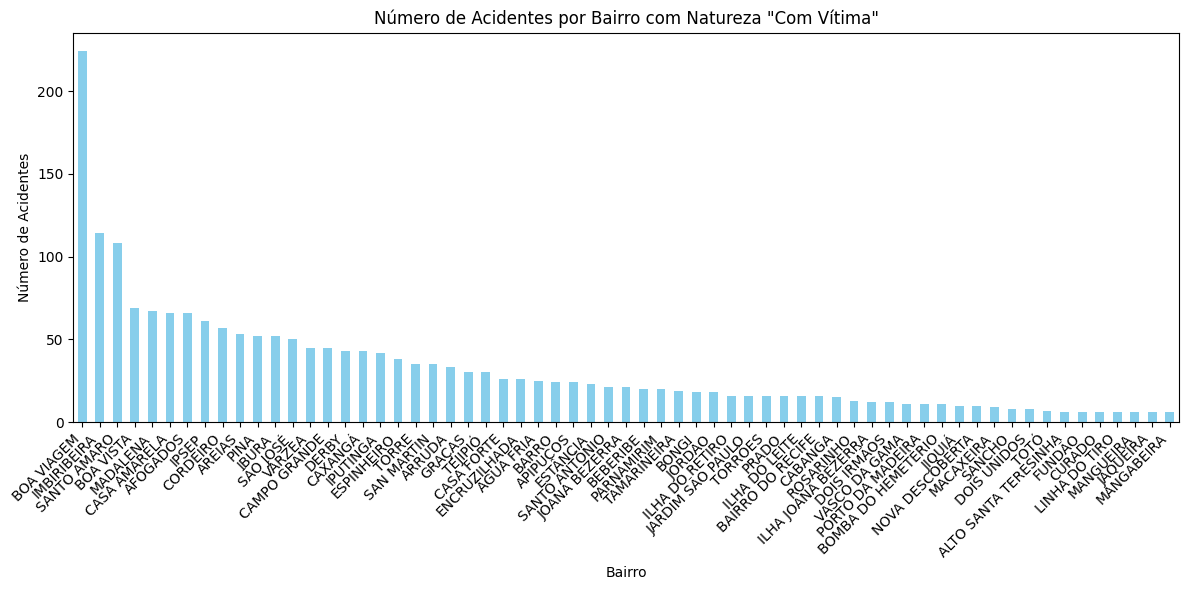

In [ ]:
# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
# Realizamos um filtro para melhor visualização no gráfico
contagem_bairros_com_vitima.loc[contagem_bairros_com_vitima > 5].plot(kind='bar', color='skyblue')
plt.title('Número de Acidentes por Bairro com Natureza "Com Vítima"')
plt.xlabel('Bairro')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos para melhor legibilidade
plt.tight_layout()
plt.show()

#### Quantidade de Acidentes por Mês

Sabemos que Dezembro é um mês de férias, de datas comemorativas, muitas viagens e consquentemente um maior fluxo no trânsito. De acordo com o Diário de Pernambuco, em Dezembro de 2022 mesmo com o aumento das fiscalizações de trânsito, dos dias 22 a 25 de Dezembro, foram registrados 44 flagrantes de motoristas que assumiram o volante depois de consumir bebida alcoólica. Além de 195 condutores autuados por ultrapassagem proibida, responsável por muitas das colisões frontais.


---


Link da reportagem: https://www.diariodepernambuco.com.br/noticia/vidaurbana/2022/12/prf-divulga-balanco-da-operacao-natal-em-pernambuco.html

In [ ]:
# Converter a coluna 'data' para o tipo datetime
dados_util['data'] = pd.to_datetime(dados_util['data'], format='%d/%m/%Y', errors='coerce')

<ipython-input-29-fe5920c8e4dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_util['data'] = pd.to_datetime(dados_util['data'], format='%d/%m/%Y', errors='coerce')


In [ ]:
# Criando uma nova coluna no dataframe, com o mês de cada data
dados_util['mes'] = dados_util['data'].dt.month

# Verificando a quantidade de acidentes em cada mês
acidentes_por_mes = dados_util['mes'].value_counts().sort_index()
acidentes_por_mes

<ipython-input-30-941011d0d512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_util['mes'] = dados_util['data'].dt.month


1     211
2     188
3     193
4     186
5     200
6     217
7     219
8     258
9     253
10    251
11    239
12    254
Name: mes, dtype: int64

In [ ]:
# Verificar se há dados ausentes na coluna 'mes'
dados_util['mes'].isna().sum()

0

In [ ]:
# Verificando como ficou nosso dataframe com a nova coluna
dados_util.head()

,data,natureza,bairro,tipo,auto,moto,pedestre,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,velocidade_max_via,ponto_controle,mes
0,2022-01-01,COM VÍTIMA,JORDÃO,COLISÃO FRONTAL,1,1,0,Bom,Não existe,Não existente,Seca,NaN,Não existe,1
1,2022-01-01,SEM VÍTIMA,IMBIRIBEIRA,COLISÃO TRASEIRA,2,0,0,Bom,Sem defeito,Perfeito estado,Seca,NaN,Faixa de pedestre,1
2,2022-01-01,COM VÍTIMA,CAXANGÁ,COLISÃO TRASEIRA,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2022-01-01,COM VÍTIMA,JOANA BEZERRA,COLISÃO LATERAL,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2022-01-02,COM VÍTIMA,AFLITOS,COLISÃO LATERAL,1,1,0,Bom,Não existe,Perfeito estado,Seca,NaN,NaN,1


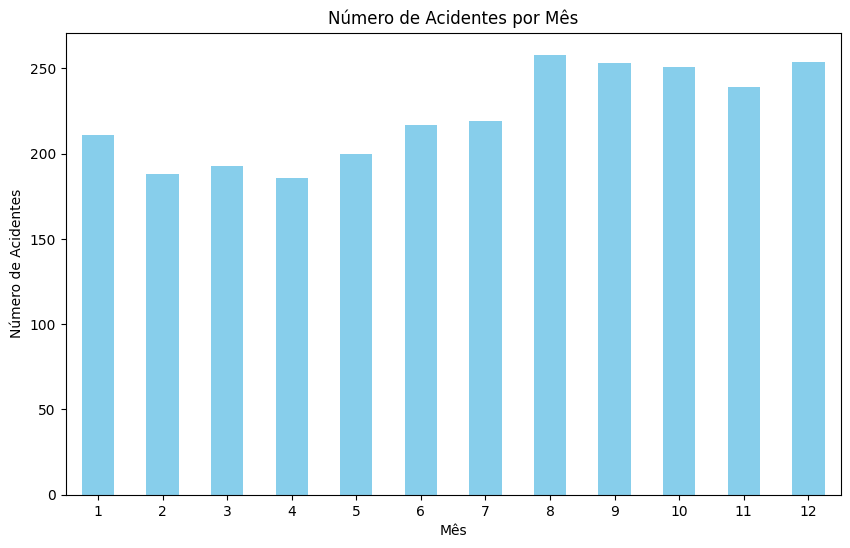

In [ ]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
acidentes_por_mes.sort_index().plot(kind='bar', color='skyblue')
plt.title('Número de Acidentes por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()

#### Importância dos Pontos de Controle

O gráfico a seguir mostra a importância dos pontos de controle e que, em locais onde o não há ponto de controle,  a quantidade de acidentes é drasticamente maior do que em locais com Faixa de pedreste, faixa de rentenção ou agentes.

Obs: Pontos de Controle são locais específicos nas vias urbanas ou rodovias onde há intervenções, sinalizações ou características especiais destinadas a garantir a segurança e o controle do tráfego,

In [ ]:
# Contar a frequência de cada ponto de controle
contagem_pontos_controle = dados['ponto_controle'].value_counts()
contagem_pontos_controle

Não existe           1180
Faixa de pedestre     615
Faixa de retenção      81
Outros                 77
Agente                 49
Name: ponto_controle, dtype: int64

In [ ]:
# Frequência percentil de cada ponto de controle
contagem_pontos_controle_perc = {}

for k, v in contagem_pontos_controle.items():
    percentual = v / len(dados_util)
    contagem_pontos_controle_perc[k] = round(percentual*100, 2)

contagem_pontos_controle_perc

{'Não existe': 44.21,
 'Faixa de pedestre': 23.04,
 'Faixa de retenção': 3.03,
 'Outros': 2.88,
 'Agente': 1.84}

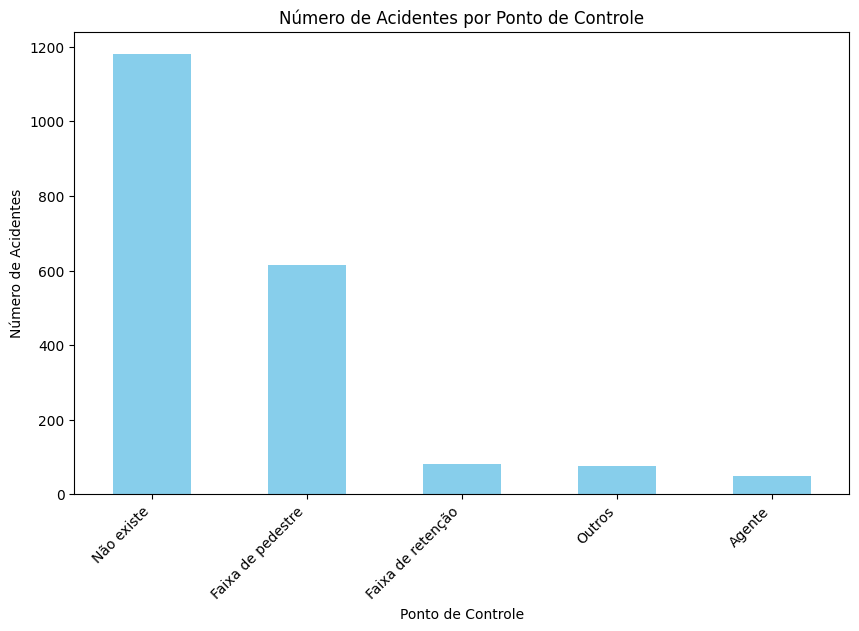

In [ ]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
contagem_pontos_controle.plot(kind='bar', color='skyblue')
plt.title('Número de Acidentes por Ponto de Controle')
plt.xlabel('Ponto de Controle')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos no eixo x para melhor legibilidade
plt.show()

#### O efeito que a condição da via tem sobre o trânsito

In [ ]:
# Mostrar as condições das vias dos acidentes
dados.condicao_via.value_counts()

Seca       1774
Molhada     324
Oleosa        5
Name: condicao_via, dtype: int64

In [ ]:
# Tabela para mostrar as condições das vias dos acidentes
condicao_da_via = pd.DataFrame(dados.condicao_via.value_counts())
condicao_da_via

,condicao_via
Seca,1774
Molhada,324
Oleosa,5


In [ ]:
# Renomeando as colunas
condicao_da_via.rename(columns={'condicao_via': 'quantidade'}, inplace=True)
condicao_da_via.name = 'condicao_via'
condicao_da_via

,quantidade
Seca,1774
Molhada,324
Oleosa,5


Com base nos dados fornecidos, é possível identificar padrões claros nas condições das vias em relação ao número de acidentes.
Obs: Surpreendentemente, a via oleosa registrou um número extremamente baixo de acidentes, apenas 5. No entanto, é importante notar que a presença de condições oleosas na pista é relativamente rara, o que pode explicar essa baixa incidência. Mesmo assim, a ocorrência de acidentes em tais condições ressalta a importância de medidas de segurança específicas para enfrentar esse desafio.


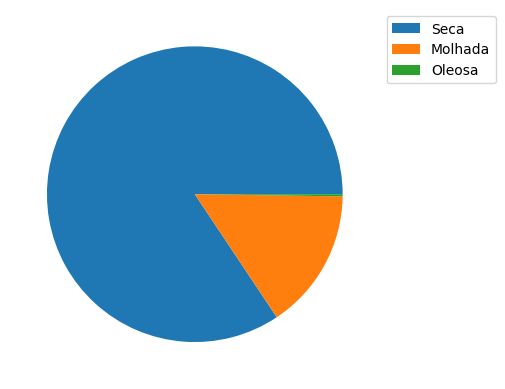

In [ ]:
#Gráfico de pizza para mostrar as condições das vias dos acidentes
plt.pie(condicao_da_via['quantidade'])
plt.legend(condicao_da_via.index, bbox_to_anchor=(1, 1))
plt.show()

#### Analisando a natureza de cada evento

In [ ]:
#Mostrar a se houve vítimas e fatalidade
natureza_acidentes = dados['natureza'].value_counts()
natureza_acidentes

COM VÍTIMA      2081
SEM VÍTIMA       566
VÍTIMA FATAL      22
Name: natureza, dtype: int64

In [ ]:
# Frequência percentil de cada ponto de controle
natureza_acidentes_perc = {}

for k, v in natureza_acidentes.items():
    percentual = v / len(dados_util)
    natureza_acidentes_perc[k] = round(percentual*100, 2)

natureza_acidentes_perc

{'COM VÍTIMA': 77.97, 'SEM VÍTIMA': 21.21, 'VÍTIMA FATAL': 0.82}

<Axes: >

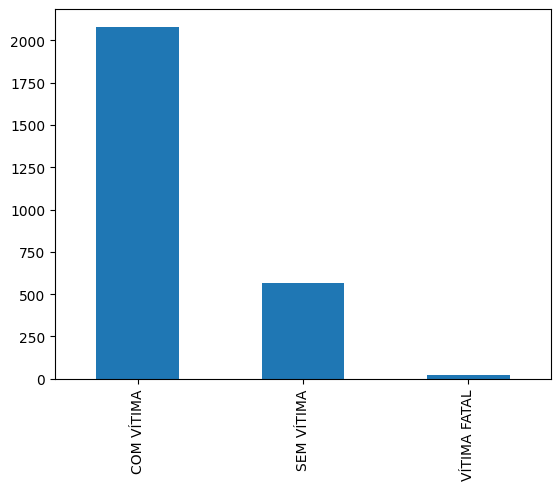

In [ ]:
vitimas = dados.natureza.value_counts()
vitimas.plot(kind = 'bar')

O gráfico que ilustra a natureza dos acidentes de trânsito revela informações cruciais. Em 2081 casos, houve acidentes com vítimas, enfatizando a necessidade de medidas de segurança eficazes. Por outro lado, 566 acidentes ocorreram sem vítimas, refletindo uma situação mais controlada. Os 22 acidentes com vítima fatal são um lembrete trágico da importância da segurança no trânsito e da necessidade contínua de prevenção e conscientização.

## Conclusões

A partir dessa breve análise estatística podemos ver que o bairro de Boa Viagem é o local onde mais ocorrem acidentes de trânsito, apresentando 301 doas 2669 acidentes registrados em nossa base. Outros dois fatores que podemos notar é que a grande maioria dos acidentes aqui registrados ocorreram com o clima bom, uma sinalização em perfeito estado e a via estando seca. Vale ressaltar que em cerca de 44% dos acidentes ocorreram em locais em que não há pontos de controle.

Enquanto motoristas, devemos estar sempre atentos ao trânsito e a via que estamos percorrendo. Em quase 78% dos acidentes houve alguma vítima.

Esses dados destacam a necessidade de atenção e precaução especial por parte dos motoristas em condições adversas, como vias molhadas ou oleosas, e a importância de implementar medidas de segurança adicionais, como sinalização apropriada e políticas de manutenção de vias, para reduzir ainda mais o número de acidentes e promover um tráfego mais seguro.